In [2]:
#1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
#2.
df = pd.read_csv("Week7_train.csv")


In [4]:
#3.
print(df.shape)

(42000, 785)


In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#4.
df_sampled = df.sample(frac=0.1, random_state=42)

In [7]:
#5.
print(df_sampled.shape)

(4200, 785)


In [8]:
#6.
df_sampled.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25536,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31803,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39863,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


digit is 1


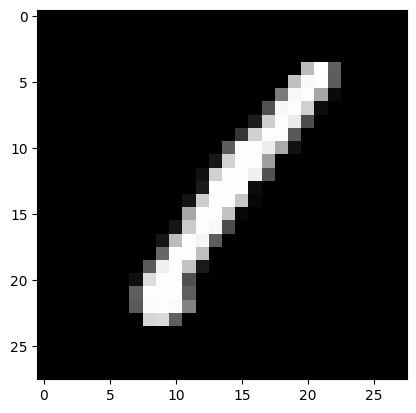

In [9]:
# Using for knowing the lebel based on pixel values by converting them into 28*28 grid 
i=0
img=df.iloc[i,1:].values.reshape(28,28)
label=df.iloc[i,0]
plt.imshow(img,cmap='gray')
print("digit is",label)

In [10]:
#7.
print(df['label'].nunique())


10


In [30]:
#8.
print(df['label'].value_counts())

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64


In [47]:
#9.
X=df_sampled.drop(columns=["label"])
Y=df_sampled.iloc[:,0]

In [56]:
print(X.shape)
print(Y.shape)

(4200, 784)
(4200,)


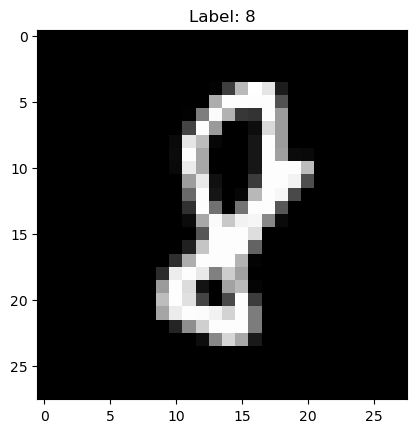

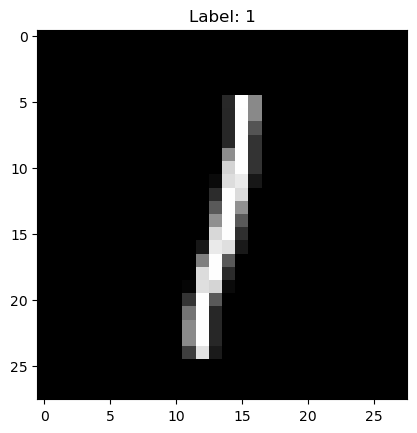

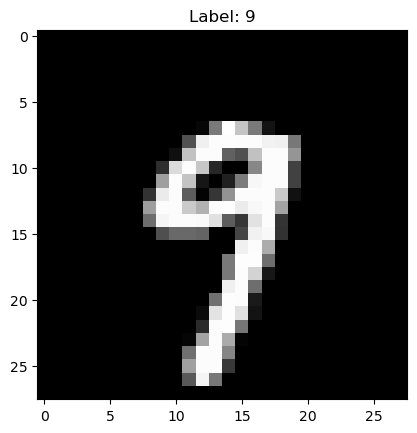

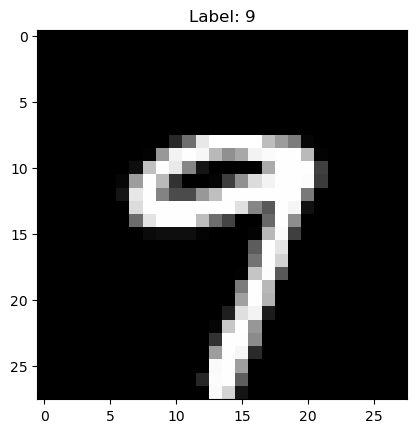

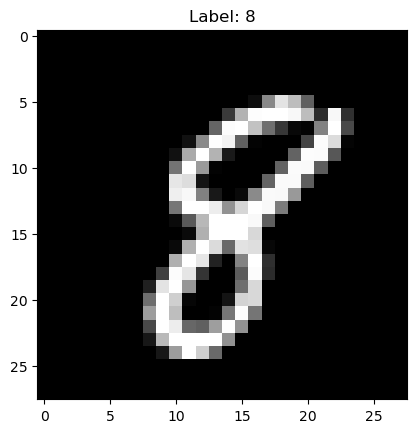

In [86]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Label: {Y.iloc[i]}")
    plt.show()


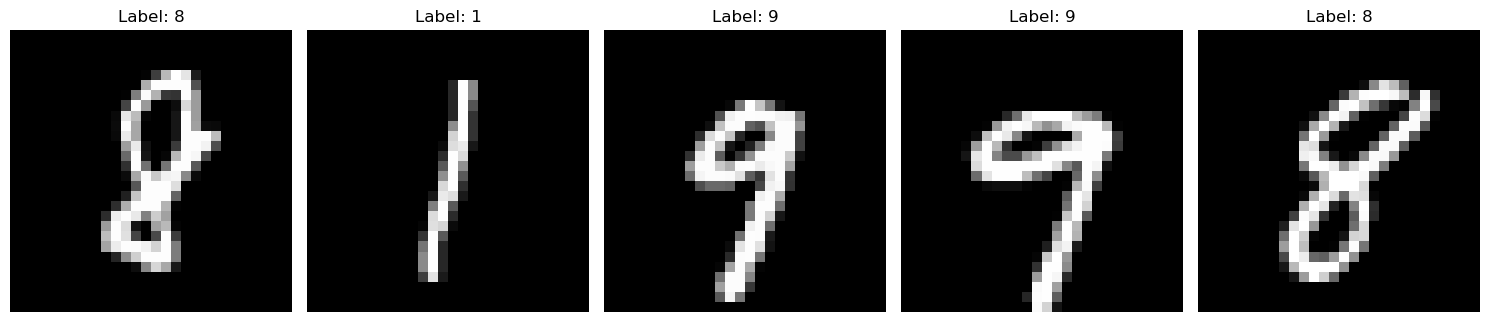

In [85]:
#10.
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {Y.iloc[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [60]:
#11.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [67]:
#12,13
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [71]:
#14.
Y_pred=knn.predict(X_test)

In [74]:
#15.
print(confusion_matrix(Y_test, Y_pred))

[[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [75]:
#16.
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050



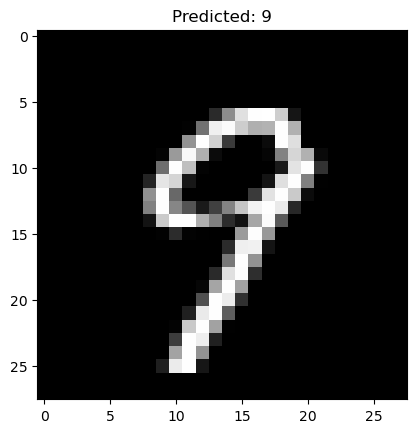

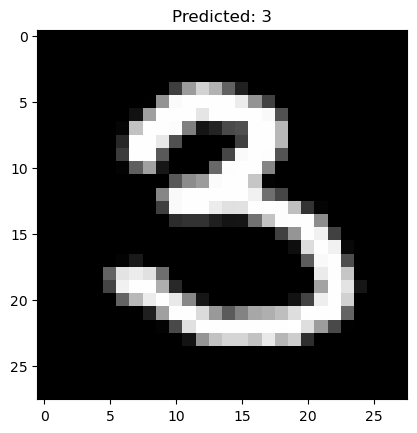

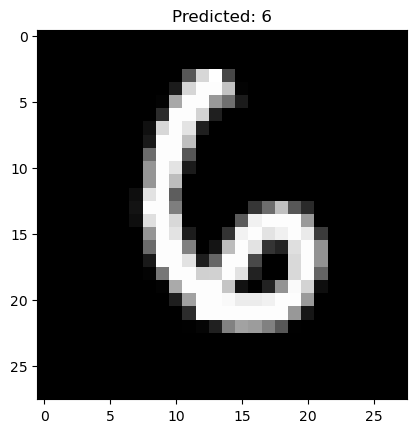

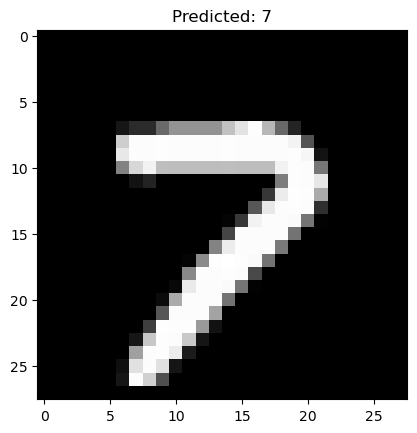

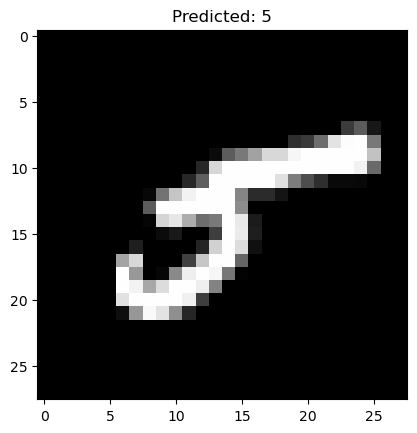

In [87]:
#17.
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {Y_pred[i]}")
    plt.show()
